In [ ]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
athletes_df=pd.read_excel('Athletes.xlsx')
coaches_df=pd.read_excel('Coaches.xlsx')
gender_df=pd.read_excel('EntriesGender.xlsx')
medals_df=pd.read_excel('Medals.xlsx')
teams_df=pd.read_excel('Teams.xlsx')
tokyo_df=pd.read_csv('Tokyo 2021 dataset.csv')
atheles_event_df=pd.read_csv('athlete_events.csv')
regions_df=pd.read_csv('noc_regions.csv')

In [ ]:
df = pd.read_excel('Medals.xlsx')
df.head(85)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,People's Republic of China,32,22,16,70,2
1,2,United States of America,25,30,22,77,1
2,3,Japan,21,7,12,40,5
3,4,Great Britain,15,18,15,48,4
4,5,Australia,15,4,17,36,6
...,...,...,...,...,...,...,...
80,79,Finland,0,0,1,1,71
81,79,Ghana,0,0,1,1,71
82,79,Kuwait,0,0,1,1,71
83,79,Malaysia,0,0,1,1,71


In [ ]:
df = pd.read_csv('Tokyo 2021 dataset.csv')
df.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


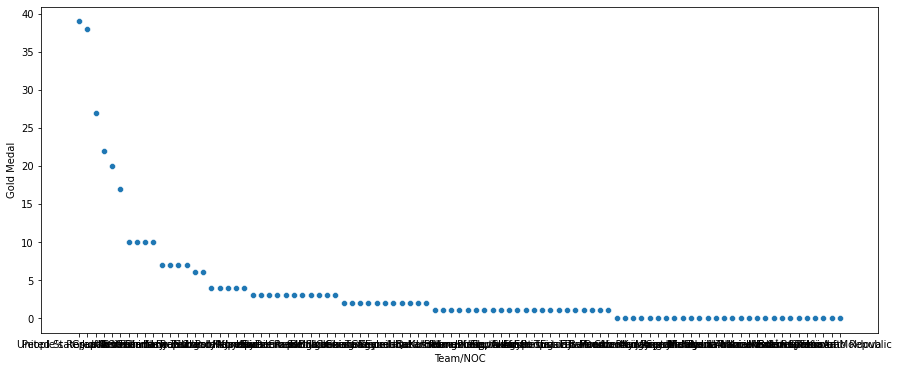

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Team/NOC", y="Gold Medal", data=df)
plt.show()

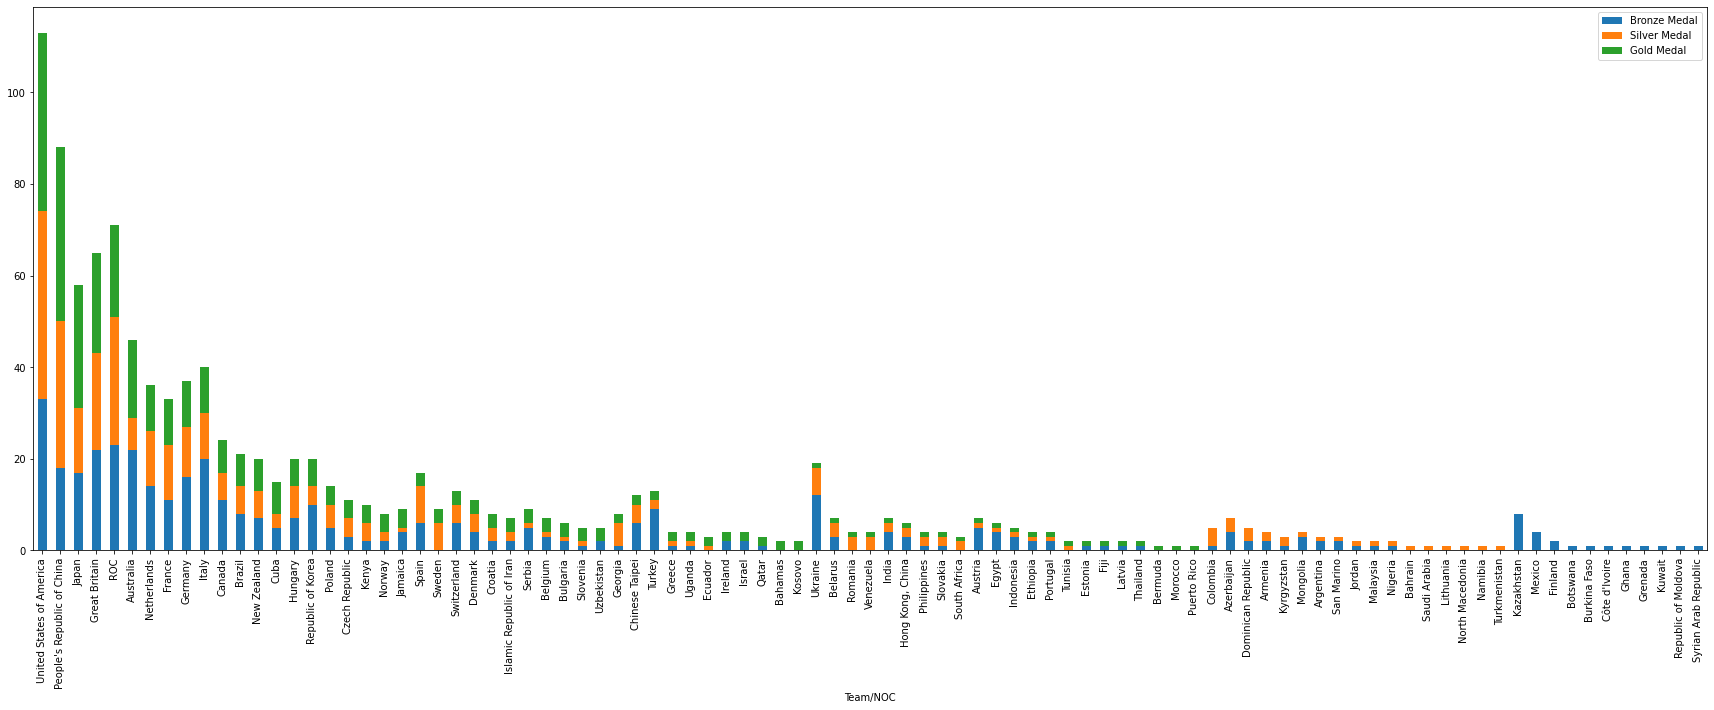

In [ ]:
tokyo_df.plot.bar(stacked=True,  figsize=(30, 10), x="Team/NOC", y=["Bronze Medal", "Silver Medal", "Gold Medal"])

In [ ]:
df=pd.read_csv('athlete_events.csv')
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


Isoler les jeux dété
Une autre methode df_summer = df.query('Season = "Summer"') un string

In [ ]:
d1 = df[df['Season']=='Summer']
d1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


le nombre de ville qui ont heberger les JO

In [ ]:
d1 = df[df['Season']=='Summer']
d1.City.unique()
d1


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


On a creer la nouvelle colone pays

In [ ]:
d1["Pays"] = " "
d1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Pays
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,


d1["Pays"][d1['City'].str.contains("London")] = "England" code pour faire le matching un a un a un 

In [ ]:
countries = {"Barcelona": "Spain",
             "London": "United Kingdom",
             "Antwerpen": "Belgium",
             "Paris": "France",
             "Los Angeles": "United States",
             "Helsinki": "Finland",
             "Sydney": "Australia",
             "Atlanta": "United States",
             "Stockholm": "Sweden",
             "Beijing": "China",
             "Rio de Janeiro": "Brazil",
             "Athina": "Greece",
             "Mexico City": "Mexico",
             "Munich": "Germany",
             "Seoul": "Korea",
             "Berlin": "Germany",
             "Melbourne": "Australia",
             "Roma": "Italia",
             "Amsterdam": "Netherlands",
             "Montreal": "Canada",
             "Moskva": "Russia",
             "Tokyo": "Japan",
             "St. Louis": "United States"}



In [ ]:
for city in d1["City"].unique():
  d1.loc[d1["City"] == city, "Pays"] = countries[city]
  d1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
d1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,COLONE,Pays
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,,France
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,,Greece
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,,Germany
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,,Australia
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,,Greece


In [ ]:
d1["NOC"]== d1["Pays"]


0         False
1         False
2         False
3         False
26        False
          ...  
271106    False
271107    False
271108    False
271109    False
271110    False
Length: 222552, dtype: bool

In [ ]:
d1["IsHost"] = d1["NOC"]== d1["Pays"]
d1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Pays,IsHost
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Spain,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,United Kingdom,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Belgium,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,France,False
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,United States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Greece,False
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,Germany,False
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Australia,False
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Greece,False


#rajouter une colonne inplace et mettre 0 ou 1 si le NOC est égale a country

In [ ]:
d1["InPlace"]= (d1["NOC"]== d1["Pays"]).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#pour set has_medal avec 0 ou 1 lorsque medal est égale a NaN



In [ ]:
d1["has_medal"]= np.where(d1["Medal"].isnull(), 0, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
d1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Pays,IsHost,InPlace,has_medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Spain,False,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,United Kingdom,False,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Belgium,False,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,France,False,0,1
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,United States,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Greece,False,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,Germany,False,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Australia,False,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Greece,False,0,0


In [ ]:
d2 = d1.drop(columns=["Sex", "Age","Event","Sport","City","Season",	"Height","InPlace","ID",	"Weight"])
d2

,Name,Team,NOC,Games,Year,Medal,Pays,IsHost,has_medal
0,A Dijiang,China,CHN,1992 Summer,1992,NaN,Spain,False,0
1,A Lamusi,China,CHN,2012 Summer,2012,NaN,United Kingdom,False,0
2,Gunnar Nielsen Aaby,Denmark,DEN,1920 Summer,1920,NaN,Belgium,False,0
3,Edgar Lindenau Aabye,Denmark/Sweden,DEN,1900 Summer,1900,Gold,France,False,1
26,"Cornelia ""Cor"" Aalten (-Strannood)",Netherlands,NED,1932 Summer,1932,NaN,United States,False,0
...,...,...,...,...,...,...,...,...,...
271106,Fernando scar Zylberberg,Argentina,ARG,2004 Summer,2004,NaN,Greece,False,0
271107,"James Francis ""Jim"" Zylker",United States,USA,1972 Summer,1972,NaN,Germany,False,0
271108,Aleksandr Viktorovich Zyuzin,Russia,RUS,2000 Summer,2000,NaN,Australia,False,0
271109,Aleksandr Viktorovich Zyuzin,Russia,RUS,2004 Summer,2004,NaN,Greece,False,0


In [ ]:
d2

,Name,Team,NOC,Games,Year,Medal,Pays,IsHost,has_medal
0,A Dijiang,China,CHN,1992 Summer,1992,NaN,Spain,False,0
1,A Lamusi,China,CHN,2012 Summer,2012,NaN,United Kingdom,False,0
2,Gunnar Nielsen Aaby,Denmark,DEN,1920 Summer,1920,NaN,Belgium,False,0
3,Edgar Lindenau Aabye,Denmark/Sweden,DEN,1900 Summer,1900,Gold,France,False,1
26,"Cornelia ""Cor"" Aalten (-Strannood)",Netherlands,NED,1932 Summer,1932,NaN,United States,False,0
...,...,...,...,...,...,...,...,...,...
271106,Fernando scar Zylberberg,Argentina,ARG,2004 Summer,2004,NaN,Greece,False,0
271107,"James Francis ""Jim"" Zylker",United States,USA,1972 Summer,1972,NaN,Germany,False,0
271108,Aleksandr Viktorovich Zyuzin,Russia,RUS,2000 Summer,2000,NaN,Australia,False,0
271109,Aleksandr Viktorovich Zyuzin,Russia,RUS,2004 Summer,2004,NaN,Greece,False,0


In [ ]:
d2.groupby(['NOC','IsHost']).has_medal.sum()


NOC  IsHost
AFG  False       2
AHO  False       1
ALB  False       0
ALG  False      17
AND  False       0
              ... 
YEM  False       0
YMD  False       0
YUG  False     383
ZAM  False       2
ZIM  False      22
Name: has_medal, Length: 230, dtype: int64

In [ ]:
d2.groupby(['NOC','IsHost']).has_medal.mean()


NOC  IsHost
AFG  False     0.015873
AHO  False     0.013514
ALB  False     0.000000
ALG  False     0.031540
AND  False     0.000000
                 ...   
YEM  False     0.000000
YMD  False     0.000000
YUG  False     0.187195
ZAM  False     0.010929
ZIM  False     0.071197
Name: has_medal, Length: 230, dtype: float64

In [ ]:
data_medal1 = d2.groupby(['NOC','IsHost','Games'])['has_medal'].sum()
data_medal1.head(50)
data_medal2 = pd.DataFrame(d2.groupby(['NOC','IsHost']).mean().sort_values(ascending =False)).reset_index()

NameError: ignored